# Análise da qualidade de vinhos brancos de Portugal

Pacote para abrir a base de dados (csv)

In [1]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Carrega o arquivo csv
import pandas as pd

# Arquivo CSV com separador ";" e acentuação em latin1
data = pd.read_csv("winequality-white.csv", sep=";", encoding="latin1")

print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality classification  
0      8.8        6          Médio  
1      9.5  

In [3]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [4]:
# Renomeando as colunas no DataFrame em memória
data = data.rename(columns={
    "fixed acidity": "acidez fixa",
    "volatile acidity": "acidez volatil",
    "citric acid": "acido citrico",
    "residual sugar": "acucar residual",
    "chlorides": "cloretos",
    "free sulfur dioxide": "dioxido de enxofre livre",
    "total sulfur dioxide": "dioxido de enxofre total",
    "density": "densidade",
    "pH": "pH",
    "sulphates": "sulfatos",
    "alcohol": "alcool",
    "quality": "qualidade",
    "classification": "classificacao"
})

# Conferindo as novas colunas
print(data.columns)

Index(['acidez fixa', 'acidez volatil', 'acido citrico', 'acucar residual',
       'cloretos', 'dioxido de enxofre livre', 'dioxido de enxofre total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade', 'classificacao'],
      dtype='object')


In [5]:
#tupla: linhas, colunas
data.shape

(4898, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez fixa               4898 non-null   float64
 1   acidez volatil            4898 non-null   float64
 2   acido citrico             4898 non-null   float64
 3   acucar residual           4898 non-null   float64
 4   cloretos                  4898 non-null   float64
 5   dioxido de enxofre livre  4898 non-null   float64
 6   dioxido de enxofre total  4898 non-null   float64
 7   densidade                 4898 non-null   float64
 8   pH                        4898 non-null   float64
 9   sulfatos                  4898 non-null   float64
 10  alcool                    4898 non-null   float64
 11  qualidade                 4898 non-null   int64  
 12  classificacao             4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [7]:
#Tratando valore nulos
import numpy as np

data = data.replace('?',np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 4898
Number of attributes = 13
Number of missing values:
	acidez fixa: 0
	acidez volatil: 0
	acido citrico: 0
	acucar residual: 0
	cloretos: 0
	dioxido de enxofre livre: 0
	dioxido de enxofre total: 0
	densidade: 0
	pH: 0
	sulfatos: 0
	alcool: 0
	qualidade: 0
	classificacao: 0


In [8]:
#atributos qualitativos -> classificacao
data['classificacao'].value_counts()

classificacao
Médio        3655
Bom          1055
Ruim          183
Excelente       5
Name: count, dtype: int64

In [9]:
#moda
#classification
data['classificacao'].mode()

0    Médio
Name: classificacao, dtype: object

In [10]:
# Verificando Quantil do teor alcólico
data['alcool'].quantile([.1, .5])

0.1     9.0
0.5    10.4
Name: alcool, dtype: float64

In [11]:
#Quantil dos demais atributos
atributos_quantitativos = data.select_dtypes(include=['float64', 'int64'])

# Calculando os quantis desejados (10% e 50%) para todas as colunas
quantis = atributos_quantitativos.quantile([0.1, 0.5])

print(quantis)


     acidez fixa  acidez volatil  acido citrico  acucar residual  cloretos  \
0.1          5.9            0.17           0.22              1.2     0.030   
0.5          6.8            0.26           0.32              5.2     0.043   

     dioxido de enxofre livre  dioxido de enxofre total  densidade    pH  \
0.1                      15.0                      87.0   0.990327  3.00   
0.5                      34.0                     134.0   0.993740  3.18   

     sulfatos  alcool  qualidade  
0.1      0.36     9.0        5.0  
0.5      0.47    10.4        6.0  


In [12]:
data.sort_values(by=['alcool'], ascending=0)

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,classificacao
3918,6.4,0.350,0.28,1.60,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,Bom
4503,5.8,0.610,0.01,8.40,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,Bom
3904,5.0,0.455,0.18,1.90,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7,Bom
3915,4.7,0.455,0.18,1.90,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7,Bom
2945,4.9,0.330,0.31,1.20,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,6.2,0.310,0.23,3.30,0.052,34.0,113.0,0.99429,3.16,0.48,8.40,5,Médio
4020,6.4,0.370,0.12,5.90,0.056,6.0,91.0,0.99536,3.06,0.46,8.40,4,Ruim
3839,6.2,0.310,0.23,3.30,0.052,34.0,113.0,0.99429,3.16,0.48,8.40,5,Médio
3265,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.00,3,Ruim


In [13]:
# média do teor alcólico
data['alcool'].mean()

np.float64(10.51426704777011)

In [14]:
#posição central dos valores
data['alcool'].median()

np.float64(10.4)

In [15]:
#amplitude do teor alcólico
data['alcool'].max() - data['alcool'].min()

np.float64(6.199999999999999)

In [16]:
#variância
data['alcool'].var()

np.float64(1.5144269817749154)

In [17]:
#desvio-padrão
data['alcool'].std()

np.float64(1.2306205677522684)

<Axes: xlabel='alcool', ylabel='Density'>

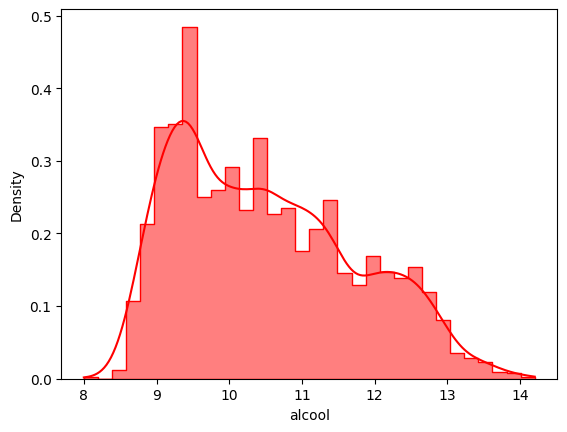

In [21]:
#%pip install seaborn  #biblioteca para visualização de dados

import seaborn as sns

sns.histplot(data['alcool'], bins=32, color="red", stat="density",kde=True,element="step")

<Axes: xlabel='alcool'>

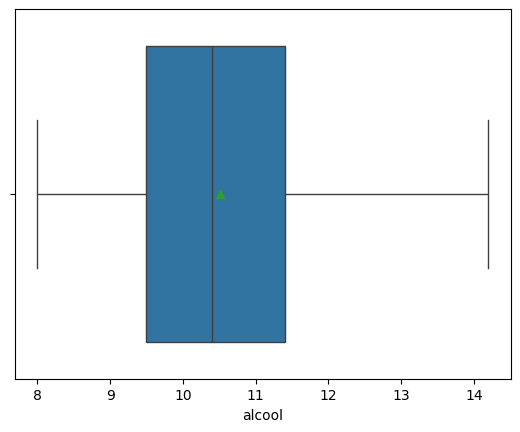

In [22]:
sns.boxplot(x='alcool', data=data, showmeans=True)

<Axes: xlabel='alcool', ylabel='classificacao'>

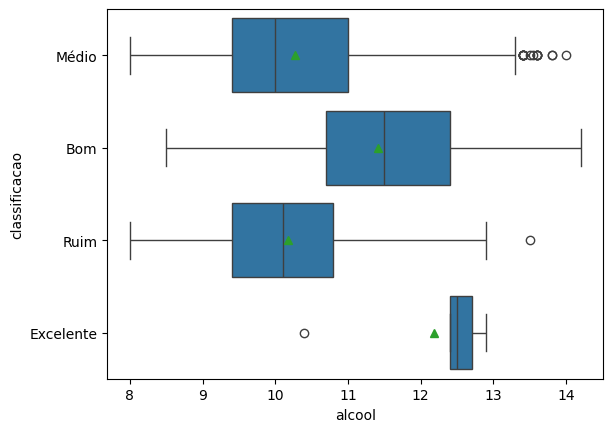

In [23]:
sns.boxplot(x='alcool', y='classificacao', data=data, showmeans=True)

<Axes: >

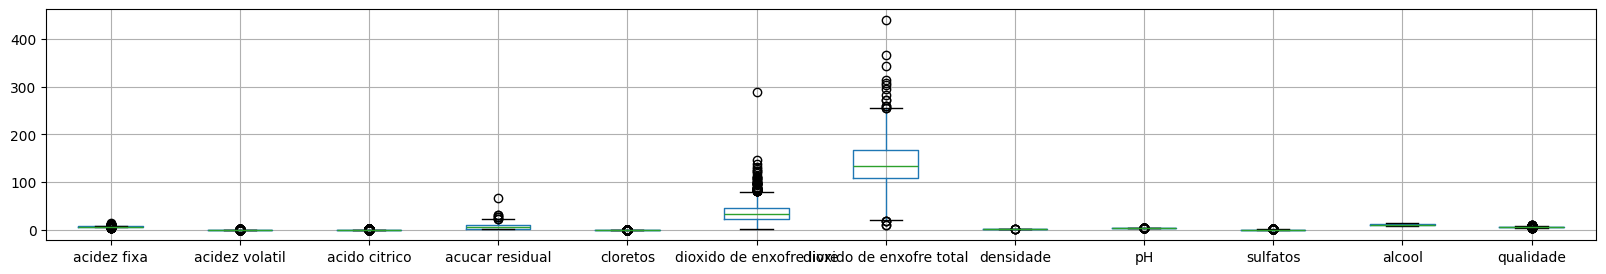

In [24]:
%matplotlib inline

data.boxplot(figsize=(20,3))

In [25]:
data = data.drop(['classificacao'],axis=1)

In [26]:
# z-score
Z = (data-data.mean())/data.std()
Z[20:25]

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
20,-0.775936,3.787495,1.204832,-1.023532,-0.767685,-0.370908,-1.490907,-1.614018,0.938628,-0.874884,1.857382,2.396114
21,-0.538932,0.315085,0.378521,-0.688363,-0.355747,-0.958897,-0.855584,-0.945324,-0.120971,-1.225374,0.394706,1.266985
22,-0.064924,-0.180973,0.709045,-0.924953,0.147732,0.334678,-0.384974,-0.343500,1.865776,-0.086281,-0.011593,2.396114
23,0.883091,3.886707,-1.604626,-0.964385,1.292003,-0.606103,0.697428,-0.109457,-0.915669,0.176587,-0.986711,-0.991273
24,-0.301928,-0.081762,0.626414,-1.003816,0.285045,-1.135293,0.085635,0.358628,1.534652,-0.173903,-0.417892,0.137856


In [27]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 4898
Number of rows after discarding missing values = 0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez fixa               4898 non-null   float64
 1   acidez volatil            4898 non-null   float64
 2   acido citrico             4898 non-null   float64
 3   acucar residual           4898 non-null   float64
 4   cloretos                  4898 non-null   float64
 5   dioxido de enxofre livre  4898 non-null   float64
 6   dioxido de enxofre total  4898 non-null   float64
 7   densidade                 4898 non-null   float64
 8   pH                        4898 non-null   float64
 9   sulfatos                  4898 non-null   float64
 10  alcool                    4898 non-null   float64
 11  qualidade                 4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
# VERIFICAÇÃO DE DUPLICATAS
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 937


In [30]:
# REMOÇÃO DE DUPLICATAS
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 4898
Number of rows after discarding duplicates = 3961


In [31]:
data.head()

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
# AMOSTRAGEM DE 1%
sample = data.sample(frac=0.01, random_state=1)
#sample

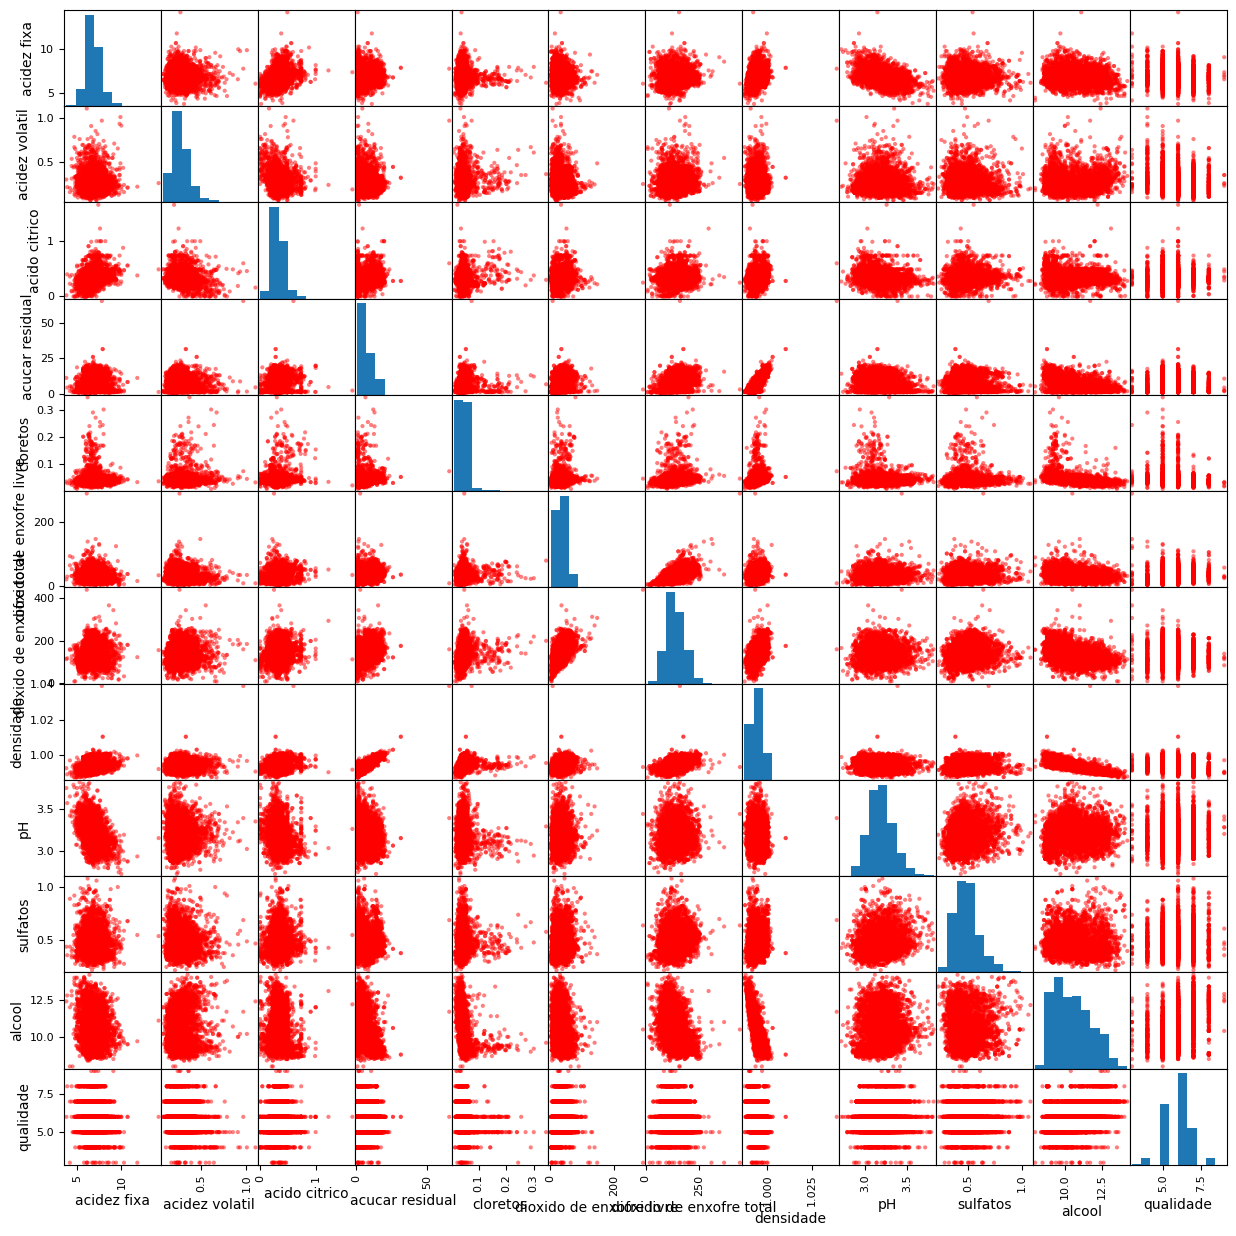

In [33]:
#Analisando a relação entre cada variável
import matplotlib.pyplot as plt


# Selecionar apenas atributos numéricos
atributos_quantitativos = data.select_dtypes(include=['float64', 'int64'])

# Matriz de dispersão
pd.plotting.scatter_matrix(atributos_quantitativos, figsize=(15, 15), diagonal='hist', color='red')

plt.show()


#Análise PCA - Diminuição de dimensionalidade

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
data_padronizado = scaler.fit_transform(data)
data_padronizado

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]],
      shape=(4898, 12))

In [36]:
#pca = PCA()
#pca = PCA(n_components=0.7)# Quanto de variância quer explicar
pca = PCA(n_components=2)# Número de componentes após fit
projected = pca.fit_transform(data_padronizado)

print("Componentes Principais")
print(pca.components_)

print("\n")
print("Variâncias")
print(pca.explained_variance_ratio_)

component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

print("\n")
components_data = pd.DataFrame(data=pca.components_,index=component_names,columns=data.columns)
components_data.head()

Componentes Principais
[[ 0.15690447  0.02428722  0.1329443   0.40605288  0.217544    0.27471931
   0.39044148  0.50129557 -0.13003701  0.03364168 -0.44279498 -0.22713722]
 [-0.56066866 -0.01606694 -0.28938115  0.03882402 -0.03691144  0.34554881
   0.27232605  0.01773344  0.56714503  0.24826266 -0.01698188  0.14603134]]


Variâncias
[0.27888907 0.13217419]




,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
component 0,0.156904,0.024287,0.132944,0.406053,0.217544,0.274719,0.390441,0.501296,-0.130037,0.033642,-0.442795,-0.227137
component 1,-0.560669,-0.016067,-0.289381,0.038824,-0.036911,0.345549,0.272326,0.017733,0.567145,0.248263,-0.016982,0.146031


In [37]:
# ALinhando pelos índices
print(data.loc[[0]])
print(data_padronizado[[0]])
print(projected[[0]])

   acidez fixa  acidez volatil  acido citrico  acucar residual  cloretos  \
0          7.0            0.27           0.36             20.7     0.045   

   dioxido de enxofre livre  dioxido de enxofre total  densidade   pH  \
0                      45.0                     170.0      1.001  3.0   

   sulfatos  alcool  qualidade  
0      0.45     8.8          6  
[[ 0.17209696 -0.0817699   0.2132802   2.82134917 -0.035355    0.56993158
   0.74456503  2.33151201 -1.24692128 -0.34918426 -1.39315246  0.13787014]]
[[ 3.54331807 -0.35508731]]


Correlação de Pearson com a qualidade:
acidez fixa                -0.113663
acidez volatil             -0.194723
acido citrico              -0.009209
acucar residual            -0.097577
cloretos                   -0.209934
dioxido de enxofre livre    0.008158
dioxido de enxofre total   -0.174737
densidade                  -0.307123
pH                          0.099427
sulfatos                    0.053678
alcool                      0.435575
Name: qualidade, dtype: float64


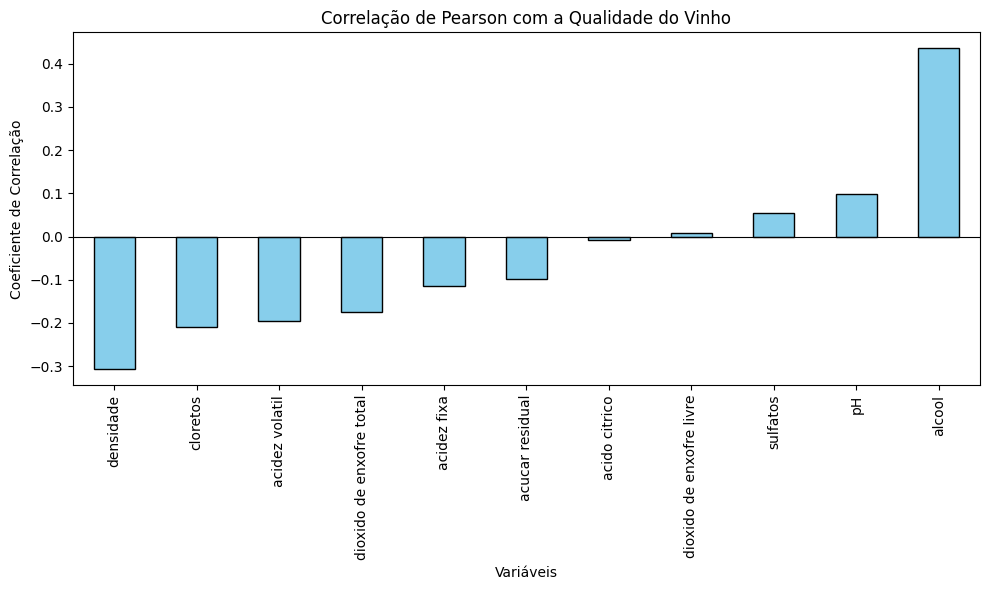

In [38]:

# Calcular correlação apenas com a coluna "quality"

correlation_with_quality = data.corr(method="pearson")["qualidade"].drop("qualidade")

# Exibir valores no console
print("Correlação de Pearson com a qualidade:")
print(correlation_with_quality)

# Plotar gráfico de barras (histograma vertical)
plt.figure(figsize=(10,6))
correlation_with_quality.sort_values().plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Correlação de Pearson com a Qualidade do Vinho")
plt.ylabel("Coeficiente de Correlação")
plt.xlabel("Variáveis")
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

## Correlações negativas (quanto mais o atributo cresce, menor tende a ser a qualidade):

Densidade: –0,31 (quanto mais denso, pior a qualidade).

Cloretos: –0,21 (mais sais → menor qualidade).

Acidez volátil: –0,19 (mais acidez volátil → vinhos com notas piores).

Dióxido de enxofre total: –0,17.

Acidez fixa: –0,11.

Açúcar residual: –0,09.

## Correlação quase nula (sem relação significativa):

Ácido cítrico: –0,01.

Dióxido de enxofre livre: +0,008.

## Correlações positivas (quanto mais o atributo cresce, maior tende a ser a qualidade):

Sulfatos: +0,05.

pH: +0,10.

Álcool: +0,44 (a mais forte e positiva).

# Observação

O atributo álcool é o que mais se relaciona positivamente com a qualidade do vinho, enquanto densidade, cloretos e acidez volátil estão entre os fatores mais prejudiciais à nota final.

Matriz de Correlação de Pearson:
                          acidez fixa  acidez volatil  acido citrico  \
acidez fixa                  1.000000       -0.022697       0.289181   
acidez volatil              -0.022697        1.000000      -0.149472   
acido citrico                0.289181       -0.149472       1.000000   
acucar residual              0.089021        0.064286       0.094212   
cloretos                     0.023086        0.070512       0.114364   
dioxido de enxofre livre    -0.049396       -0.097012       0.094077   
dioxido de enxofre total     0.091070        0.089261       0.121131   
densidade                    0.265331        0.027114       0.149503   
pH                          -0.425858       -0.031915      -0.163748   
sulfatos                    -0.017143       -0.035728       0.062331   
alcool                      -0.120881        0.067718      -0.075729   
qualidade                   -0.113663       -0.194723      -0.009209   

                          acuc

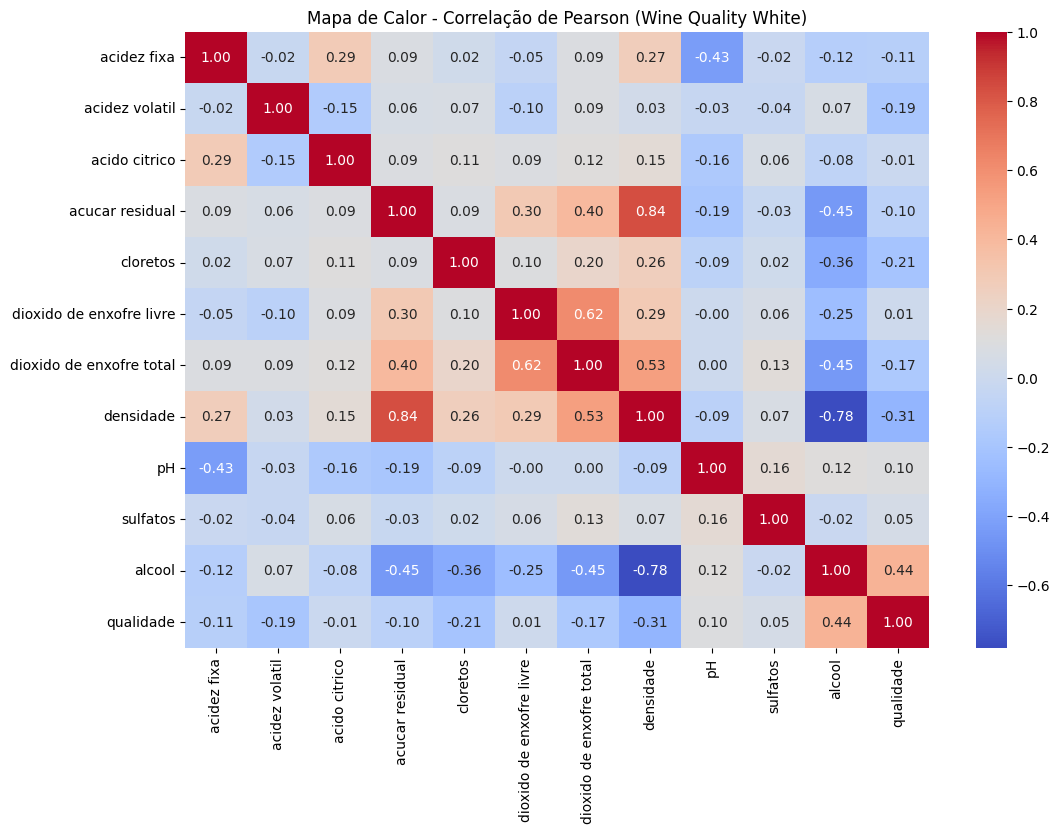

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação de Pearson
correlation_matrix = data.corr(method="pearson")

# Exibir a matriz
print("Matriz de Correlação de Pearson:")
print(correlation_matrix)

# Plotar o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Mapa de Calor - Correlação de Pearson (Wine Quality White)")
plt.show()


In [40]:
# Definir função de classificação
def rotular_classificacao(valor):
    if valor <= 3:
        return "péssimo"
    elif valor == 4:
        return "ruim"
    elif valor in [5, 6]:
        return "médio"
    elif valor in [7, 8]:
        return "bom"
    else:  # 9 ou 10
        return "excelente"

# Criar nova coluna 'classificacao' com base na coluna 'qualidade'
data["classificacao"] = data["qualidade"].apply(rotular_classificacao)

# Conferir as primeiras linhas
print(data[["qualidade", "classificacao"]].head())


   qualidade classificacao
0          6         médio
1          6         médio
2          6         médio
3          6         médio
4          6         médio


classificacao
médio        3655
bom          1055
ruim          163
péssimo        20
excelente       5
Name: count, dtype: int64

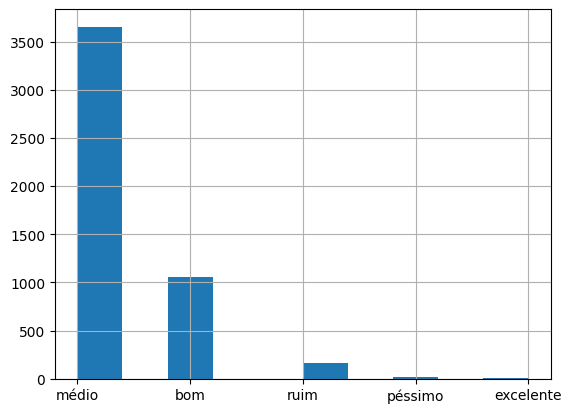

In [41]:
data['classificacao'].hist(bins=10)
data['classificacao'].value_counts(sort=False)

In [42]:
data.head()

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,classificacao
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,médio
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,médio
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,médio
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,médio
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,médio


<Axes: >

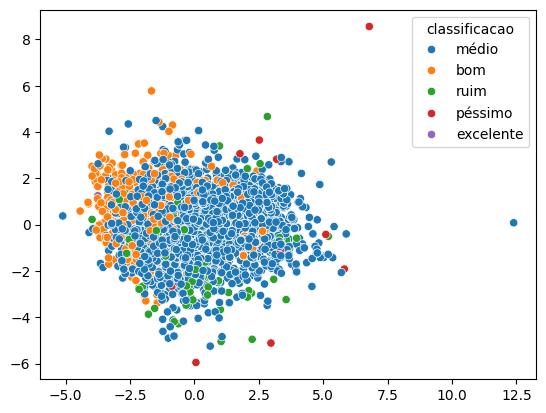

In [43]:
instancias_classes = data["classificacao"]
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=instancias_classes)#dim1-pca, dim2-pca, classes

Os dados estão desbalanceados e ficaram proximamente agrupados. Vinhos de classificação "média" estão mais presentes no conjunto de dados.